# 1.1

In [ ]:
from urllib.request import urlopen
html = urlopen("https://stepik.org/media/attachments/lesson/209717/1.html").read().decode('utf-8')
s=str(html)
print('Python' if s.count('Python') > s.count('C++') else 'C++')

C++


или

In [ ]:
import requests
res = requests.get('https://stepik.org/media/attachments/lesson/209717/1.html').text
print('Python' if res.count('Python') > res.count('C++') else 'C++')

C++


# 1.2

In [ ]:
from urllib.request import urlopen
html = urlopen("https://ru.wikipedia.org/wiki/Python").read().decode('utf-8')
s=str(html)
ans = []
state = 0
for c in s:
  if c == '<':
    state = 1
  if c == '>':
    state = 0
  elif state == 0:
    ans.append(c)
s = ''.join(ans)
print(s.count('C++'))

13


Файл https://stepik.org/media/attachments/lesson/209719/2.html содержит статью с Википедии про язык Python. В этой статье есть теги code, которыми выделяются конструкции на языке Python. Вам нужно найти все строки, содержащиеся между тегами ```<code>``` и ```</code>``` и найти те строки, которые встречаются чаще всего и вывести их в алфавитном порядке, разделяя пробелами.

Например, если исходный текст страницы выглядел бы так:
```
<code>a</code>
<a>bracadabr</a>
<code>c</code>
<code>b</code>
<code>b</code>
<code>c</code>
```
то в ответ надо было бы ввести строку "b c".

In [ ]:
import requests
import re
import collections
s = requests.get('https://stepik.org/media/attachments/lesson/209719/2.html').text
muster = r'<code>(.*?)</code>'
l = sorted(re.findall(muster, s))
for i, j in sorted(collections.Counter(l).most_common(3)):
  print(i, end=' ')


else except finally 

# 1.3

In [ ]:
from urllib.request import urlopen
html = urlopen("https://ru.wikipedia.org/wiki/Python").read().decode('utf-8')
s=str(html)
pos = s.find('<a href=')
while pos != -1:
  posquote = s.find('"', pos + 9)
  href = s[pos + 9:posquote]
  print(href)
  pos = s.find('<a href=', pos + 1)

Познакомиться с основами языка HTML и прочитать tutorial по BeautifulSoup можно здесь: https://www.dataquest.io/blog/web-scraping-tutorial-python/ Полезная для нас информация содержится до раздела Extracting information from the page включительно.

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup

resp = urlopen('https://stepik.org/media/attachments/lesson/245130/6.html') # скачиваем файл
html = resp.read().decode('utf8') # считываем содержимое
soup = BeautifulSoup(html, 'html.parser') # делаем суп
table = soup.find('table', attrs = {'class' : 'wikitable sortable'})
cnt = 0
for tr in soup.find_all('tr'):
    cnt += 1
    for td in tr.find_all(['td', 'th']):
        cnt *= 2
print(cnt)

94596065609609271052308


# 1.4

Полезная ссылка про HTML и базовое использование BeautifulSoup https://www.dataquest.io/blog/web-scraping-tutorial-python/

Советуем вам установить BeautifulSoup и проверить его работу на одном из примеров по ссылке.

или вот это

http://wiki.python.su/Документации/BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
html = urlopen("https://ru.wikipedia.org/wiki/Python").read().decode('utf-8')
s=str(html)
soup = BeautifulSoup(s, 'html.parser')
for a in soup.find_all('a', href=True):
  print(a['href'])

Подробнее изучить HTML можно, например, тут: http://htmlbook.ru/samhtml

Документация и дополнительные примеры по библиотеке BeautifulSoup доступна тут: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

http://wiki.python.su/Документации/BeautifulSoup

# 1.4.4

В файле https://stepik.org/media/attachments/lesson/209723/3.html находится одна таблица. Просуммируйте все числа в ней и введите в качестве ответа одно число - эту сумму. Для доступа к ячейкам используйте возможности BeautifulSoup.

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
html = urlopen("https://stepik.org/media/attachments/lesson/209723/3.html").read().decode('utf-8')
s=str(html)
soup = BeautifulSoup(s, 'html.parser')
total = 0
for line in soup.find_all('td'):
    total += int(line.get_text())
print(total)

1005425


решение степика

In [ ]:
import requests as req
from bs4 import BeautifulSoup
res = req.get('https://stepik.org/media/attachments/lesson/209723/3.html')
soup = BeautifulSoup(res.text, 'html.parser')
print(sum(int(td.text) for td in soup.find_all('td')))

1005425


# 1.4.5

В файле https://stepik.org/media/attachments/lesson/209723/4.html находится одна таблица. Просуммируйте все числа в ней. Теперь мы добавили разных тегов для изменения стиля отображения. Для доступа к ячейкам используйте возможности BeautifulSoup.

In [ ]:
from bs4 import BeautifulSoup
import requests as r
page = r.get("https://stepik.org/media/attachments/lesson/209723/4.html")
soup = BeautifulSoup(page.text, 'html.parser')
total = 0
for line in soup.find_all('td'):
    total += int(line.get_text())
print(total)

29536


ИБО!

Судя по тому, что у меня работает код от предыдущего решения, получается метод get_text() из BeautifulSoup продолжает парсить то что находится внутри тега, пока не доберется до текста. И не важно, что внутри ```<td></td>```  будут еще вложенные теги. 

Например, если td = soup.find_all('td') 

то для тегов типа ```<td><i><b> 53 </b></i></td> ``` метод td.get_text() все равно вернет строку " 53 "

И еще, пока читала доку, обратила внимание, что при чтении файла с помощью res = requests.get(...), метод res.text возвращает строку, а метод res.content значение в байтах. При этом BeautifulSoup прекрасно съедает оба варианта при парсинге.

# 1.4.6

В файле https://stepik.org/media/attachments/lesson/209723/5.html находится одна таблица. Просуммируйте все числа в ней. Теперь мы не только добавили разных тегов для изменения стиля отображения, но и сделали невалидный HTML-код (правда, браузеры его отображают, а вот с BeautifulSoup могут быть проблемы). Невалидный HTML-код - не редкость в интернете, надо учиться работать и с этим.

Вы можете исправить html-код или попробовать использовать нестандартный парсер html, такой как html5lib.

In [ ]:
from bs4 import BeautifulSoup
import requests as r
page = r.get("https://stepik.org/media/attachments/lesson/209723/5.html")
soup = BeautifulSoup(page.text, 'html.parser')
total = 0
for line in soup.find_all('td'):
    total += int(line.get_text())
print(total)

28734


вариант степика

In [ ]:
import requests
import re

res = requests.get('https://stepik.org/media/attachments/lesson/209723/5.html')

print(sum(int(n) for n in re.findall(r'\D(\d+?)\D', res.text)))

28734


или

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

html = urlopen('https://stepik.org/media/attachments/lesson/209723/5.html').read().decode('utf-8')
print(sum([int(tag.text) for tag in bs(html, 'html.parser').find_all('td')]))

28734


или

In [ ]:
import pandas as pd

df = pd.read_html('https://stepik.org/media/attachments/lesson/209723/5.html')
# print(df)
sum(df).sum().sum()

28734

# **2.1**

https://habr.com/ru/post/232291/

https://tokmakov.msk.ru/blog/item/71

https://github.com/python-excel/tutorial/raw/master/python-excel.pdf

In [ ]:
import xlrd, xlwt
#открываем файл
rb = xlrd.open_workbook('../ArticleScripts/ExcelPython/xl.xls',formatting_info=True)

#выбираем активный лист
sheet = rb.sheet_by_index(0)

In [ ]:
!wget https://www.hse.ru/data/2018/10/24/1142173545/%D0%A2%D0%B5%D0%BA.%D1%80%D0%B5%D0%B9%D1%82%D0%B8%D0%BD%D0%B3%20%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%20%D0%BF%D0%B5%D1%80%D0%B5%D1%81%D0%B4%D0%B0%D1%87_4%20%D0%BA%D1%83%D1%80%D1%81.xlsx 

--2021-01-14 13:12:26--  https://www.hse.ru/data/2018/10/24/1142173545/%D0%A2%D0%B5%D0%BA.%D1%80%D0%B5%D0%B9%D1%82%D0%B8%D0%BD%D0%B3%20%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%20%D0%BF%D0%B5%D1%80%D0%B5%D1%81%D0%B4%D0%B0%D1%87_4%20%D0%BA%D1%83%D1%80%D1%81.xlsx
Resolving www.hse.ru (www.hse.ru)... 186.2.163.228
Connecting to www.hse.ru (www.hse.ru)|186.2.163.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 233822 (228K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘Тек.рейтинг после пересдач_4 курс.xlsx’

Тек.рейтинг после п 100%[===================>] 228.34K  --.-KB/s    in 0.1s    

2021-01-14 13:12:26 (1.80 MB/s) - ‘Тек.рейтинг после пересдач_4 курс.xlsx’ saved [233822/233822]



In [ ]:
import xlrd, xlwt
rb = xlrd.open_workbook('current_rate_before_past_4.xlsx')
sheet = rb.sheet_by_index(0) # select active list(sheet)
val = sheet.row_values(0)[0] # take value first row A1
print(val)

Текущий рейтинг студентов (после пересдач)


Для решения этой задачи необходимо установить библиотеку xlrd, скачать файл https://stepik.org/media/attachments/lesson/245266/tab.xlsx и создать в папке с этим файлом скрипт со следующем содержанием:

In [ ]:
import xlrd
!wget https://stepik.org/media/attachments/lesson/245266/tab.xlsx
wb = xlrd.open_workbook('tab.xlsx')
sheet_names = wb.sheet_names()
sh = wb.sheet_by_name(sheet_names[0])
nmin = sh.row_values(6)[2]
for rownum in range(7, 27):
    temp = sh.row_values(rownum)
    nmin = min(nmin, temp[2])
print(nmin)

--2021-01-16 14:08:15--  https://stepik.org/media/attachments/lesson/245266/tab.xlsx
Resolving stepik.org (stepik.org)... 13.69.75.239
Connecting to stepik.org (stepik.org)|13.69.75.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19651 (19K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘tab.xlsx’

tab.xlsx            100%[===================>]  19.19K  --.-KB/s    in 0s      

2021-01-16 14:08:16 (126 MB/s) - ‘tab.xlsx’ saved [19651/19651]

39650.2


# 2.2

In [ ]:
import xlrd
!wget https://stepik.org/media/attachments/lesson/245266/tab.xlsx
rb = xlrd.open_workbook('tab.xlsx')
#the flag - formatting_info=True - is only working for xls-files, but not for xlsx
# выбираем активный лист
sheet = rb.sheet_by_index(0)
# получаем значение певой ячейки A1
val = sheet.row_values(0)[0]
print(val)

--2021-01-16 14:21:11--  https://stepik.org/media/attachments/lesson/245266/tab.xlsx
Resolving stepik.org (stepik.org)... 13.69.75.239
Connecting to stepik.org (stepik.org)|13.69.75.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19651 (19K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘tab.xlsx.2’

tab.xlsx.2          100%[===================>]  19.19K  --.-KB/s    in 0s      

2021-01-16 14:21:11 (231 MB/s) - ‘tab.xlsx.2’ saved [19651/19651]

 Средняя заработная плата  научных сотрудников* в организациях государственной и муниципальной форм собственности по субъектам Российской Федерации за январь - июнь 2019 года


In [ ]:
#получаем список значений из всех записей
vals = [sheet.row_values(rownum) for rownum in range(sheet.nrows)]
werts = vals[12][2:]
print(*werts)

39650.2 - -


2.2.2

Вася планирует карьеру и переезд. Для это составил таблицу, в которой для каждого региона записал зарплаты для разных интересные ему профессий. Таблица доступна по ссылке https://stepik.org/media/attachments/lesson/245267/salaries.xlsx. Выведите название региона с самой высокой медианной зарплатой (медианой называется элемент, стоящий в середине массива после его упорядочивания) и, через пробел, название профессии с самой высокой средней зарплатой по всем регионам. 

In [ ]:
import pandas as pd
data = pd.read_excel('https://stepik.org/media/attachments/lesson/245267/salaries.xlsx')  
data

,Unnamed: 0,Программист,Менеджер по клинингу,Дизайнер онлайн-курсов,Собачий парикмахер,Учитель для нейросетей,Сотрудник конной милиции,Актёр на роль человека-бутерброда
0,Москва,765,9876,546585,6,65876,765,213
1,Улан-Батор,87,87698,7698,965765,769,659,21523
2,Посёлок гидроузла имени Куйбышева,987595,87,5,7676,8765,9,4356
3,Крёкшино,9876,8769,9859,897698,7,69,342
4,Станица Юго-Северная,8769,987687,23,1212,9876,23871,3224
5,Куала-Лумпур,189710,787,765679,9769,57686,769829,53632
6,Хабнарфьордюр,65,76796,807,765685,97659,56913,32
7,Ытык-Кюёль,769,786578,1368,59625,6758,76587,3453


In [ ]:
reg = data.median(axis = 1).idxmax()
print(data.iloc[reg, 0], data.mean(axis = 0).idxmax())

Куала-Лумпур Собачий парикмахер


вариант степика

In [ ]:
import pandas as pd

data = pd.read_excel('https://stepik.org/media/attachments/lesson/245267/salaries.xlsx', index_col=0)
print(data.median(axis=1).idxmax(), data.mean(axis=0).idxmax())

Куала-Лумпур Собачий парикмахер


или

In [ ]:
import xlrd
from statistics import median, mean
!wget https://stepik.org/media/attachments/lesson/245267/salaries.xlsx
wb = xlrd.open_workbook('salaries.xlsx')
sh = wb.sheet_by_index(0)
d = {sh.cell_value(row,0): median(sh.row_values(row)[1:]) for row in range(1,9)}
e = {sh.cell_value(0,col): mean(sh.col_values(col)[1:]) for col in range(1,8)}
print(max(d, key=lambda k: d[k]), max(e, key=lambda k: e[k]))

--2021-01-16 17:57:15--  https://stepik.org/media/attachments/lesson/245267/salaries.xlsx
Resolving stepik.org (stepik.org)... 13.69.75.239
Connecting to stepik.org (stepik.org)|13.69.75.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5732 (5.6K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘salaries.xlsx’

salaries.xlsx       100%[===================>]   5.60K  --.-KB/s    in 0s      

2021-01-16 17:57:15 (301 MB/s) - ‘salaries.xlsx’ saved [5732/5732]

Куала-Лумпур Собачий парикмахер


# 2.3

In [ ]:
import xlrd
# !wget https://www.hse.ru/data/2018/10/24/1142173545/%D0%A2%D0%B5%D0%BA.%D1%80%D0%B5%D0%B9%D1%82%D0%B8%D0%BD%D0%B3%20%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%20%D0%BF%D0%B5%D1%80%D0%B5%D1%81%D0%B4%D0%B0%D1%87_4%20%D0%BA%D1%83%D1%80%D1%81.xlsx 
results = {}

rb = xlrd.open_workbook('Тек.рейтинг после пересдач_4 курс.xlsx')
#the flag - formatting_info=True - is only working for xls-files, but not for xlsx
# выбираем активный лист
sheet = rb.sheet_by_index(0)
# получаем значение певой ячейки A1
val = sheet.row_values(0)[0]
#получаем список значений из всех записей
vals = [sheet.row_values(rownum) for rownum in range(sheet.nrows)]
subjects = vals[8][15:-1]
for i in range(10, len(vals)):
  row = vals[i]
  name = row[1]
  grades = row[9:]
  if name not in results:
    results[name] = {}
  for j in range(len(subjects)):
    results[name][subjects[j] + '-7'] = grades[j]
print(results)

{'Гринберг Вадим Маркович': {'Введение в программирование на Erlang-7': 110.0, 'Вероятностные модели и статистика случайных процессов-7': 11.0, 'Конфликты и кооперация-7': 10.0, 'Непрерывная оптимизация-7': '', 'Обучение с подкреплением-7': 11.0, 'Цифровые технологии в гуманитарных науках-7': '', 'Алгоритмы на графах-7': '', 'Важнейшие элементы больших данных: HDFS, MapReduce и Spark RDD-7': '', 'Введение в глубинное обучение-7': '', 'Введение в лингвистику-7': 10.0, 'Введение в нейроэкономику: как человеческий мозг принимает решения-7': '', 'Введение в цифровое изображение и видео-процессинг-7': '', 'Визуальная социология как средство исследования современной культуры. Кино как социологический текст-7': 10.0, 'Вычислительные нейронауки-7': '', 'Графы и топология-7': '', 'Дизайн функциональных программ в Scala-7': '', 'Дискретная оптимизация-7': '', 'Дополнительные главы и сложность алгоритмов-7': '', 'ИТ-сервисы-7': '', 'Игры без шансов: теория комбинаторных игр-7': '', 'Интерактивная

# 2.3.2

Васю назначили завхозом в туристической группе и он подошёл к подготовке ответственно, составив справочник продуктов с указанием калорийности на 100 грамм, а также содержание белков, жиров и углеводов на 100 грамм продукта. Ему не удалось найти всю информацию, поэтому некоторые ячейки остались незаполненными (можно считать их значение равным нулю). Также он использовал какой-то странный офисный пакет и разделял целую и дробную часть чисел запятой. Таблица доступна по ссылке https://stepik.org/media/attachments/lesson/245290/trekking1.xlsx

Вася хочет минимизировать вес продуктов и для этого брать самые калорийные продукты. Помогите ему и упорядочите продукты по убыванию калорийности. В случае, если продукты имеют одинаковую калорийность - упорядочите их по названию. В качестве ответа необходимо сдать названия продуктов, по одному в строке.

die Hilfe

https://pythonz.net/references/named/sorted/
```
my_dict = {'a': 3, 'c': 1, 'b': 2}
# Упорядочим элементы словаря по ключам.
sorted(my_dict.items(), key=lambda item: item[0])  
# [('a', 3), ('b', 2), ('c', 1)]
# Упорядочим элементы словаря по значениям.
sorted(my_dict.items(), key=lambda item: item[1])  
# [('c', 1), ('b', 2), ('a', 3)]
my_dict = {'a': 3, 'c': 1, 'b': 2, '0': 3}
# Упорядочим по значениям и ключам.
sorted(my_dict.items(), key=lambda item: (item[1], item[0]))
# [('c', 1), ('b', 2), ('0', 3), ('a', 3)]
# А теперь по значениям по убыванию и ключам.
sorted(my_dict.items(), key=lambda item: (-item[1], item[0]))
# [('0', 3), ('a', 3), ('b', 2), ('c', 1)]
```

In [ ]:
import xlrd, xlwt
# !wget https://stepik.org/media/attachments/lesson/245290/trekking1.xlsx
results = {}

rb = xlrd.open_workbook('trekking1.xlsx')
# выбираем активный лист
sheet = rb.sheet_by_index(0)
# получаем значение певой ячейки A1
val = sheet.row_values(0)[0]
#получаем список значений из всех записей
vals = [sheet.row_values(rownum) for rownum in range(sheet.nrows)]
# parameters = vals[8][15:-1]
for i in range(1, len(vals)):
  row = vals[i]
  name = row[0]
  param = row[1:]
  if name not in results:
    results[name] = []
  for j in range(len(param)):
    results[name].append(param[j])
res = sorted(results.items(), key=lambda item: (-item[1][0], item[0]))
for i, j in res:
  print(i)

# wb = xlwt.Workbook()
# ws = wb.add_sheet('Test')
# for i, (j, k) in enumerate(res):
#   ws.write(i, 0, j)
# wb.save("Test.xls")

вариант степика

In [ ]:
import pandas as pd

data = pd.read_excel('https://stepik.org/media/attachments/lesson/245290/trekking1.xlsx')
print(*data.sort_values(by=['ККал на 100', 'Unnamed: 0'], ascending=[False, True]
                        )['Unnamed: 0'].to_list(), sep='\n')

или

In [ ]:
import pandas as pd
df = pd.ExcelFile("https://stepik.org/media/attachments/lesson/245290/trekking1.xlsx").parse() # формируем dataframe
df_sorted = df.sort_values(by=['ККал на 100', 'Unnamed: 0'], ascending=[False, True]) #сортируем по двум столбцам
# первый по убыванию, второй - по возрастанию (по алфавиту)
df_sorted

или

In [ ]:
import xlrd

wb = xlrd.open_workbook('trekking1.xlsx')
sh = wb.sheet_by_index(0)
l = [sh.row_values(row)[0:2] for row in range(1, sh.nrows)]
l = sorted(l, key=lambda x: (-x[1], x[0]))
for i in l:
    print(i[0])

# 2.3.3

Васю назначили завхозом в туристической группе и он подошёл к подготовке ответственно, составив справочник продуктов с указанием калорийности на 100 грамм, а также содержание белков, жиров и углеводов на 100 грамм продукта. Ему не удалось найти всю информацию, поэтому некоторые ячейки остались незаполненными (можно считать их значение равным нулю). Также он использовал какой-то странный офисный пакет и разделял целую и дробную часть чисел запятой. Таблица доступна по ссылке https://stepik.org/media/attachments/lesson/245290/trekking2.xlsx 

Вася составил раскладку по продуктам на один день (она на листе "Раскладка") с указанием названия продукта и его количества в граммах. Посчитайте 4 числа: суммарную калорийность и граммы белков, жиров и углеводов. Числа округлите до целых вниз и введите через пробел.

In [ ]:
import xlrd, xlwt
# !wget https://stepik.org/media/attachments/lesson/245290/trekking2.xlsx
results = {}

rb = xlrd.open_workbook('trekking2.xlsx')
sheet1 = rb.sheet_by_index(0)
sheet2 = rb.sheet_by_index(1)
vals1 = [sheet1.row_values(rownum) for rownum in range(1, sheet1.nrows)]
vals2 = [sheet2.row_values(rownum) for rownum in range(1, sheet2.nrows)]
for i in range(len(vals1)):
  row = vals1[i]
  name = row[0]
  param = [i or 0 for i in row[1:]]
  for j in range(len(vals2)):
    if vals2[j][0] == name:
      if name not in results:
        results[name] = [param[i]*vals2[j][1]/100 for i in range(len(param))]
      else:
        results[name] = [results[name][i] + 
                         param[i]*vals2[j][1]/100 for i in range(len(param))]
# for i in results:
#   res = [round(i, 2) for i in results[i]]
#   print(i, ' '.join(map(str, res)))
res = [0,0,0,0]
for i in results:
  for j in range(4):
    res[j] += results[i][j]
print(' '.join(map(str, map(int, res))))

4963 203 307 302


вариант степика

In [ ]:
import pandas as pd

url = 'https://stepik.org/media/attachments/lesson/245290/trekking2.xlsx'
calorific = pd.read_excel(url, sheet_name=0, index_col=0).fillna(0)
weight = pd.read_excel(url,	sheet_name=1, index_col=[0])
# ration = weight.join(calorific, how='inner')
ration = pd.concat([weight.groupby('Продукт').sum(), calorific], axis=1, join='inner')
print(*ration.apply(lambda x: x.iloc[1:] * x.iloc[0] / 100, axis=1).sum(axis=0).astype('int'))

4963 203 307 302


In [ ]:
import numpy as np

df1 = pd.DataFrame({'A':[5,8,7, np.nan],
                   'B':[1,np.nan,np.nan,9],
                   'C':[7,3,np.nan,0]})

df2 = pd.DataFrame({'A':[np.nan,np.nan,np.nan,2],
                   'B':[1,2,np.nan,np.nan],
                   'C':[np.nan,6,np.nan,3]})
df = pd.concat([df1, df2],axis=1, join='inner')
df1


,A,B,C
0,5.0,1.0,7.0
1,8.0,NaN,3.0
2,7.0,NaN,NaN
3,NaN,9.0,0.0


join='inner' объединяет по индексам, которые есть в обоих датафреймах. index_col=0 делает индексами первый столбец (с названиями продуктов). Иначе индексы будут от 0 до длины датафрейма без единицы.

или

In [ ]:
import xlrd, requests
res = requests.get('https://stepik.org/media/attachments/lesson/245290/trekking2.xlsx')
wb = xlrd.open_workbook(file_contents=res.content)
sh_spr = wb.sheet_by_name(wb.sheet_names()[0])
sh_ras = wb.sheet_by_name(wb.sheet_names()[1])
res = [0,0,0,0]
for i in range(1, sh_ras.nrows):
    n, p = sh_ras.row_values(i)
    for j in range(1, sh_spr.nrows):
        if n == sh_spr.row_values(j)[0]:
            s = [x*p/100 if x else 0 for x in sh_spr.row_values(j,1)]   
            res = [x+y for x,y in zip(res, s)]
print(*map(int, res))

4963 203 307 302


# 2.3.4

Васю назначили завхозом в туристической группе и он подошёл к подготовке ответственно, составив справочник продуктов с указанием калорийности на 100 грамм, а также содержание белков, жиров и углеводов на 100 грамм продукта. Ему не удалось найти всю информацию, поэтому некоторые ячейки остались незаполненными (можно считать их значение равным нулю). Также он использовал какой-то странный офисный пакет и разделял целую и дробную часть чисел запятой. Таблица доступна по ссылке https://stepik.org/media/attachments/lesson/245290/trekking3.xlsx

Вася составил раскладку по продуктам на весь поход (она на листе "Раскладка") с указанием номера дня, названия продукта и его количества в граммах. Для каждого дня посчитайте 4 числа: суммарную калорийность и граммы белков, жиров и углеводов. Числа округлите до целых вниз и введите через пробел. Информация о каждом дне должна выводиться в отдельной строке.

In [ ]:
import xlrd, requests
res = requests.get('https://stepik.org/media/attachments/lesson/245290/trekking3.xlsx')
wb = xlrd.open_workbook(file_contents=res.content)
spr = wb.sheet_by_index(0)
ras = wb.sheet_by_index(1)
res = {}
for i in range(1, ras.nrows):
    n, p = ras.row_values(i, 1)
    day = ras.row_values(i)[0]
    if day not in res:
      res[day] = [0,0,0,0]
    for j in range(1, spr.nrows):
        if n == spr.row_values(j)[0]:
            s = [x*p/100 if x else 0 for x in spr.row_values(j,1)] 
# row_values(rowx, start_colx=0, end_colx=None)  
            res[day] = [x+y for x,y in zip(res[day], s)]
new_res = sorted(res.items(), key=lambda item: item[0]) 
for i, j in new_res:
    print(*map(int, j))

2405 82 154 172
4963 203 307 302
5219 178 267 502
4873 241 204 537
5278 243 314 367
4451 190 188 497
4806 205 265 386
5738 264 195 720
1766 66 90 171


вариант степика

In [ ]:
import pandas as pd

url = 'https://stepik.org/media/attachments/lesson/245290/trekking3.xlsx'
sheet_1 = pd.read_excel(url, sheet_name=0, index_col=0).fillna(0)
sheet_2 = pd.read_excel(url,	sheet_name=1, index_col=[0])
for day in sheet_2.index.unique():
  ration = pd.concat([sheet_2.loc[day].groupby('Продукт').sum(), sheet_1], axis=1, join='inner')
  print(*ration.apply(lambda x: x.iloc[1:] * x.iloc[0] / 100, axis=1).sum(axis=0).astype('int'))

2405 82 154 172
4963 203 307 302
5219 178 267 502
4873 241 204 537
5278 243 314 367
4451 190 188 497
4806 205 265 386
5738 264 195 720
1766 66 90 171


# **2.4**

# 2.4.2

Главный бухгалтер компании "Рога и копыта" случайно удалил ведомость с начисленной зарплатой. К счастью, у него сохранились расчётные листки всех сотрудников. Помогите по этим расчётным листкам восстановить зарплатную ведомость. Архив с расчётными листками доступен по ссылке https://stepik.org/media/attachments/lesson/245299/rogaikopyta.zip (вы можете скачать и распаковать его вручную или самостоятельно научиться делать это с помощью скрипта на Питоне).

Ведомость должна содержать 1000 строк, в каждой строке должно быть указано ФИО сотрудника и, через пробел, его зарплата. Сотрудники должны быть упорядочены по алфавиту.

In [ ]:
!wget https://stepik.org/media/attachments/lesson/245299/rogaikopyta.zip
!unzip rogaikopyta.zip -d '/content/test'

In [ ]:
import xlrd, xlwt
wb = xlwt.Workbook()
ws = wb.add_sheet('Test')
res = {}
for i in range(1, 1001):
    filename = '/content/test/' + str(i) + '.xlsx'
    rb = xlrd.open_workbook(filename)
    sheet = rb.sheet_by_index(0)
    name = sheet.row_values(1)[1]
    gehalt = sheet.row_values(1)[3]
    res[name] = gehalt
new_res = sorted(res.items(), key=lambda item: item[0])
# for i, j in new_res:
#     print(i, int(j))
# for i, (n, g) in enumerate(new_res):
#     ws.write(i, 0, n)
#     ws.write(i, 1, int(g))
# wb.save('/content/ans.xlsx')
f = open('/content/answer.txt', 'w', encoding='utf-8')
for i, j in new_res:
    f.write(str(i) + ' ' + str(int(j)) + '\n')
f.close()

вариант степика

In [ ]:
import pandas as pd
import zipfile
import requests
import io


sheet = pd.Series()
url = 'https://stepik.org/media/attachments/lesson/245299/rogaikopyta.zip'
r = requests.get(url)

with r, zipfile.ZipFile(io.BytesIO(r.content)) as archive:
	for member in archive.infolist():
		slip = pd.read_excel(io.BytesIO(archive.read(member)))
		sheet.loc[slip.iloc[0, 1]] = int(slip.iloc[0, 3])

with open('salaries.txt', 'w') as salaries:
	salaries.write('\n'.join(sheet.sort_index().reset_index(). \
		apply(lambda x: f'{x.iloc[0]} {x.iloc[1]}', axis=1)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


или

In [ ]:
import xlrd, xlwt, requests, zipfile, io
res = requests.get(' https://stepik.org/media/attachments/lesson/245299/rogaikopyta.zip')
zfile = zipfile.ZipFile(io.BytesIO(res.content), 'r')
ww = xlwt.Workbook() 
ws = ww.add_sheet('zp')
l = []
for x in zfile.infolist():
    wb = xlrd.open_workbook(file_contents=zfile.read(x))
    sh = wb.sheet_by_name(wb.sheet_names()[0])
    l += [(sh.row_values(1)[1], sh.row_values(1)[3])]
for i, s in enumerate(sorted(l)):
    ws.write(i, 0, s[0])
    ws.write(i, 1, s[1])
ww.save('zp.xlsx')

# **3.1**

https://www.openstreetmap.org

In [ ]:
!pip install git+https://github.com/martinblech/xmltodict.git

  Cloning https://github.com/martinblech/xmltodict.git to /tmp/pip-req-build-g0pshawv
  Running command git clone -q https://github.com/martinblech/xmltodict.git /tmp/pip-req-build-g0pshawv
  Created wheel for xmltodict: filename=xmltodict-0.12.0-py2.py3-none-any.whl size=9928 sha256=50becc3aab36303094ed47896e70bd6b54d990ca26578835784de469c644a668
  Stored in directory: /tmp/pip-ephem-wheel-cache-g3wpyvkn/wheels/8e/02/e6/e178fbec9fa4a9f256e7dcdb4b96525f27eb3b9d324d4d9a04
Successfully built xmltodict


In [ ]:
import xmltodict

xmltodict.parse("""<?xml version="1.0" ?>
<person>
  <name>john</name>
  <age>20</age>
</person>""")

OrderedDict([('person', OrderedDict([('name', 'john'), ('age', '20')]))])

In [ ]:
print(dict(xmltodict.parse("""<?xml version="1.0" ?>
<person>
  <name>john</name>
  <age>20</age>
</person>""")))

{'person': OrderedDict([('name', 'john'), ('age', '20')])}


In [ ]:
dct = xmltodict.parse("""<?xml version="1.0" ?>
<person>
  <name>john</name>
  <age>20</age>
</person>""")
print(dct['person']['name'])

john


# 3.1.3

В этой задаче нужно просто установить библиотеку xmltodict, скачать файл https://stepik.org/media/attachments/lesson/245571/map1.osm, создать в директории с файлом скрипт со следующим содержанием:
```
import xmltodict

fin = open('map1.osm', 'r', encoding='utf8')
xml = fin.read()
fin.close()

parsedxml = xmltodict.parse(xml)
print(parsedxml['osm']['node'][100]['@id'])
```
и ввести в качестве ответа вывод этого скрипта.

In [ ]:
import xmltodict
!wget https://stepik.org/media/attachments/lesson/245571/map1.osm
fin = open('map1.osm', 'r', encoding='utf8')
xml = fin.read()
fin.close()

parsedxml = xmltodict.parse(xml)
print(parsedxml['osm']['node'][100]['@id'])

--2021-01-19 12:13:17--  https://stepik.org/media/attachments/lesson/245571/map1.osm
Resolving stepik.org (stepik.org)... 13.69.75.239
Connecting to stepik.org (stepik.org)|13.69.75.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1741991 (1.7M) [application/octet-stream]
Saving to: ‘map1.osm’

map1.osm            100%[===================>]   1.66M  3.50MB/s    in 0.5s    

2021-01-19 12:13:18 (3.50 MB/s) - ‘map1.osm’ saved [1741991/1741991]

296932122


вариант степика

In [ ]:
import requests
import xmltodict

url = 'https://stepik.org/media/attachments/lesson/245571/map1.osm'
xml = requests.get(url).content
parsedxml = xmltodict.parse(xml)
print(parsedxml['osm']['node'][100]['@id'])

296932122


или

In [ ]:
import xmltodict
import requests

res = requests.get('https://stepik.org/media/attachments/lesson/245571/map1.osm')
parsedxml = xmltodict.parse(res.content)
print(parsedxml['osm']['node'][100]['@id'])

296932122


# 3.2

комментарий. В лекции ссылка не участсвует

https://docs.python.org/3/library/xml.html

Открывать файлы лучше с использованием менеджера контекста

with open('map.osm', 'r', encoding='utf-8') as fin:

In [ ]:
import xmltodict

fin = open("/content/map.osm", 'r', encoding='utf-8')
text = fin.read()
fin.close()
shops = 0
dct = xmltodict.parse(text)
for node in dct['osm']['node']:
  if 'tag' in node:
    tags = node['tag']
    if isinstance(tags, list):
      for tag in tags:
        if '@k' in tag and tag['@k'] == 'shop':
          shops += 1
print(shops)

1


# 3.2.2

В OpenStreetMap XML встречаются теги node, которые соответствуют некоторым точкам на карте. Ноды могут не только обозначать какой-то точечный объект, но и входить в состав way (некоторой линии, возможно замкнутой) и не иметь собственных тегов. Для доступного по ссылке https://stepik.org/media/attachments/lesson/245678/map1.osm фрагмента карты посчитайте, сколько node имеет хотя бы один вложенный тэг tag, а сколько - не имеют. В качестве ответа введите два числа, разделённых пробелом.

In [ ]:
import xmltodict
import requests

res = requests.get('https://stepik.org/media/attachments/lesson/245678/map1.osm')
dct = xmltodict.parse(res.content)
c = 0
ch = 0
for node in dct['osm']['node']:
  c += 1
  if 'tag' in node:
    ch += 1
print(ch, c-ch)

316 6166


коменнтарий

Библиотеки Питона:

xml.etree.ElementTree - разберёт файл в виде дерева. Возможен поиск find() и findall().
xml.dom.minidom - разберёт файл как DOM объект. Поиск Document.getElementsByTagName() и остальные функции для DOM (легко будет тем, кто работал с JS и HTML).
Библиотека xmltodict создана по [спецификации](https://www.xml.com/pub/a/2006/05/31/converting-between-xml-and-json.html) правила конвертирования XML в JSON и обратно. Будет понятно что и как заносится из файла в словарь, какие обозначения.

пример из степика

In [ ]:
import xmltodict, requests
res = requests.get('https://stepik.org/media/attachments/lesson/245678/map1.osm').text
xml = xmltodict.parse(res)
s = ['t' if 'tag' in nodes else 'n' for nodes in xml['osm']['node']]
print(s.count('t'), s.count('n'))

316 6166


или

In [ ]:
import xml.etree.ElementTree

tree = xml.etree.ElementTree.parse('map1.osm')
root = tree.getroot()

count_tags = []
for val in root.findall('node'):
    tag = val.find('tag')
    count_tags.append('empty' if tag is None else 'have')

print(count_tags.count('have'), count_tags.count('empty'))

# **3.3**

Поищем типы магазинов

https://wiki.openstreetmap.org/wiki/Key:shop

In [ ]:
import xmltodict

fin = open("/content/map (1).osm", 'r', encoding='utf-8')
text = fin.read()
fin.close()
shops = 0
names = []
dct = xmltodict.parse(text)
for node in dct['osm']['node']:
  if 'tag' in node:
    tags = node['tag']
    flag = False
    name = 'noname'
    if isinstance(tags, list):
      for tag in tags:
        if '@k' in tag and tag['@k'] == 'shop' and tag['@v'] == 'supermarket':
          shops += 1
          flag = True
        if '@k' in tag and tag['@k'] == 'name':
          name = tag['@v']
    if flag:
      names.append(name)
print(shops)
print(*names)

1
Пятёрочка


# 3.3.2

Вася решил открыть АЗС (заправку). Чтобы оценить уровень конкуренции он хочет изучить количество заправок в интересующем его районе. Вася скачал интересующий его кусок карты OSM https://stepik.org/media/attachments/lesson/245681/map2.osm и хочет посчитать, сколько на нём отмечено точечных объектов (node), являющихся заправкой. В качестве ответа вам необходимо вывести одно число - количество АЗС.

"Как обозначается заправка в OpenStreetMap" - пример хорошего запроса чтобы узнать, как обозначается заправка в OpenStreetMap.

In [ ]:
import xmltodict, requests
res = requests.get('https://stepik.org/media/attachments/lesson/245681/map2.osm').text
dct = xmltodict.parse(res)
fuels = 0
for node in dct['osm']['node']:
  if 'tag' in node:
    tags = node['tag']
    if isinstance(tags, list):
      for tag in tags:
        if ('@k' in tag and 'fuel' in tag['@k']) or ((tag['@v'])=='fuel'):
          fuels += 1
          break
    elif isinstance(tags, dict):
      if (tags['@v'])=='fuel':
        fuels += 1
print(fuels)

15


решение степика

In [ ]:
import xml.etree.ElementTree as ET

root = ET.parse('map2.osm').getroot()
nodes = root.findall("./node/tag[@k='amenity'][@v='fuel']")
print(len(nodes))

или

In [ ]:
from lxml import etree

tree = etree.parse('map2.osm')
root = tree.getroot()
print(len(root.xpath('./node/tag[@k="amenity" and @v="fuel"]')))

# **3.4**

In [ ]:
import xmltodict
import urllib.request

urllib.request.urlretrieve('https://www.openstreetmap.org/api/0.6/map?bbox=39.7213%2C43.5782%2C39.7406%2C43.5954', 'map.osm')
fin = open("map.osm", 'r', encoding='utf-8')
text = fin.read()
fin.close()
shops = 0
names = []
dct = xmltodict.parse(text)
for node in dct['osm']['node']:
  if 'tag' in node:
    tags = node['tag']
    flag = False
    name = 'noname'
    if isinstance(tags, list):
      for tag in tags:
        if '@k' in tag and tag['@k'] == 'shop' and tag['@v'] == 'supermarket':
          shops += 1
          flag = True
        if '@k' in tag and tag['@k'] == 'name':
          name = tag['@v']
    if flag:
      names.append(name)
print(shops)
print(*names)

13
S-Klad Магнит Магнит Перекрёсток Магнит Магнит Пятёрочка Перекрёсток Пятёрочка Магнит Пятерочка Пятерочка магнит


# 3.4.2

Вася, открывший заправку в прошлом уроке, разорился. Конкуренция оказалась слишком большой. Вася предполагает, что это произошло от того, что теги заправки могут быть не только на точке, но и на каком-то контуре. Определите, сколько заправок на самом деле (не только обозначенных точкой) есть на фрагменте карты https://stepik.org/media/attachments/lesson/245681/map2.osm

In [ ]:
import xmltodict, requests
res = requests.get('https://stepik.org/media/attachments/lesson/245681/map2.osm').text
dct = xmltodict.parse(res)
fuels = 0

for some in dct['osm']:
  if isinstance(dct['osm'][some], list):
    for some_with_tag in dct['osm'][some]:
      if 'tag' in some_with_tag:
        tags = some_with_tag['tag']
        if isinstance(tags, list):
          for tag in tags:
            if ('@k' in tag and 'fuel' in tag['@k']) or ((tag['@v'])=='fuel'):
              fuels += 1
              break
        elif isinstance(tags, dict):
          if ('@k' in tags and 'fuel' in tags['@k']) or ((tags['@v'])=='fuel'):
            fuels += 1
print(fuels)

27


решение степика

In [ ]:
with open('map2.osm', 'r', encoding='utf8') as f:
    print(sum('v="fuel"' in v for v in f))

или

In [ ]:
import re
with open('map2.osm', 'r') as f:
    print(len(re.findall('<tag k="amenity" v="fuel"/>', f.read())))

или

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(open('map2.osm'), 'lxml')
print(len(soup.select('tag[k=amenity][v=fuel]')))

# **4.1**

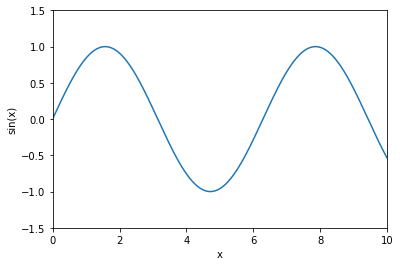

In [ ]:
import matplotlib.pyplot as plt # подключаем библиотеку с коротким названием, чтобы не писать каждый раз много букв
import math

fig = plt.figure() # создаем график

plt.axis([0, 10, -1.5, 1.5]) # на оси x будет изображаться участок от 0 до 10, а на оси y от -1.5 до 1.5

plt.xlabel('x') # подпись оси x
plt.ylabel('sin(x)') # подпись оси y

xs = [] # здесь будут параметры функции (x координаты изображаемых точек)
sin_vals = [] # здесь будут значения функции (y координаты изображаемых точек)

x = 0.0
while x < 10.0: # заполняем списки
    sin_vals.append(math.sin(x))
    xs.append(x)
    x += 0.01

plt.plot(xs, sin_vals) # создаем график: первый аргумент - список x-координат, второй - соответствующие y-координаты

fig.savefig('sin.png') # сохраняем график в файл

Можно заметить, что последовательные точки в нем соединяются линиями - это стиль по умолчанию.

Если вы хотите, чтобы график не сохранялся в файл, а показывался в отдельном, то вместо последней строки нужно написать plt.show(). Естественно, с этим могут возникнуть проблемы, если вы работаете на удаленном терминале, так что способ с сохранением в файл более универсальный, но для быстрой отладки такой быстрый показ графика достаточно полезен.

В следующем задании мы проверим, удалось ли вам установить matplotlib, а затем перейдем к нашему обычному процессу совместного гугления для решения возникающих перед нами задач.

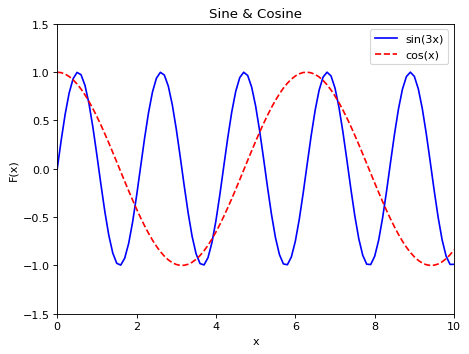

In [ ]:
#!/usr/bin/env python3

import matplotlib as mpl
import matplotlib.pyplot as plt
import math

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.axis([0, 10, -1.5, 1.5])

plt.title('Sine & Cosine')
plt.xlabel('x')
plt.ylabel('F(x)')

xs = []
sin_vals = []
cos_vals = []

x = 0.0
while x < 10.0:
    sin_vals += [ math.sin(3 * x) ]
    cos_vals += [ math.cos(x) ]
    xs += [x]
    x += 0.1

plt.plot(xs, sin_vals, color = 'blue', linestyle = 'solid',
         label = 'sin(3x)')
plt.plot(xs, cos_vals, color = 'red', linestyle = 'dashed',
         label = 'cos(x)')

plt.legend(loc = 'upper right')
fig.savefig('trigan.png')

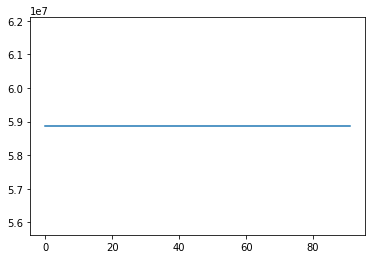

In [ ]:
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

import xlrd

res = requests.get('https://www.hse.ru/data/2018/10/24/1142173545/%D0%A2%D0%B5%D0%BA.%D1%80%D0%B5%D0%B9%D1%82%D0%B8%D0%BD%D0%B3%20%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%20%D0%BF%D0%B5%D1%80%D0%B5%D1%81%D0%B4%D0%B0%D1%87_4%20%D0%BA%D1%83%D1%80%D1%81.xlsx')
rb = xlrd.open_workbook(file_contents=res.content)

sheet = rb.sheet_by_index(0)
subjs = sheet.row_values(0)
grades = {}
for subj in subjs[1:]:
  grades[subj] = [0,0]
for rownum in range(1, sheet.nrows):
  row = sheet.row_values(rownum)
  for i in range(1, len(subjs)):
    if isinstance(row[i], float):
      grades[subjs[i]][0] += row[i]
      grades[subjs[i]][1] += 1
mvals = []
for subj in subjs[1:]:
  mvals.append(grades[subj][0]/grades[subj][1])

plt.plot(mvals)
x = list(range(len(subj)-1))
plt.xticks(x, subjs[1:], rotation = 'vertical')
plt.ylabel('some numbers')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plt.savefig('foo.png', dpi = 100)

Мы нашли хорошую статью, которая находится по ссылке https://eax.me/python-matplotlib/, она может быть вам полезна.

Воспользуемся первым примером оттуда:

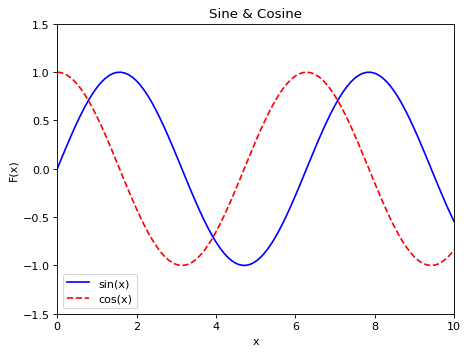

In [ ]:
#!/usr/bin/env python3
# vim: set ai et ts=4 sw=4:

import matplotlib as mpl
import matplotlib.pyplot as plt
import math

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.axis([0, 10, -1.5, 1.5])

plt.title('Sine & Cosine')
plt.xlabel('x')
plt.ylabel('F(x)')

xs = []
sin_vals = []
cos_vals = []

x = 0.0
while x < 10.0:
    sin_vals += [ math.sin(x) ]
    cos_vals += [ math.cos(x) ]
    xs += [x]
    x += 0.1

plt.plot(xs, sin_vals, color = 'blue', linestyle = 'solid',
         label = 'sin(x)')
plt.plot(xs, cos_vals, color = 'red', linestyle = 'dashed',
         label = 'cos(x)')

plt.legend(loc = 'lower left')
fig.savefig('trigan.png')

Вам необходимо переместить легенду (подписи к графикам) из правого верхнего в левый нижний угол. Исправьте ровно одну строку в этой программе (не меняя ничего другого) и сдайте исправленный исходный код программы. Пожалуйста, используйте одинарные кавычки и расстановку пробелов в том же стиле, в котором написан пример.

Воспользуемся еще одним примером из статьи https://eax.me/python-matplotlib/:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


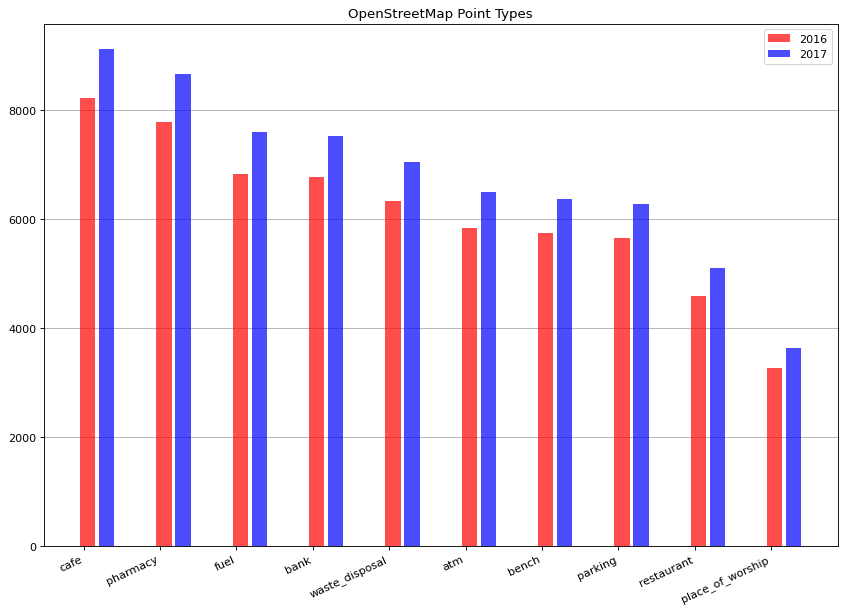

In [ ]:
#!/usr/bin/env python3
# vim: set ai et ts=4 sw=4:

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import csv

data_names = ['cafe', 'pharmacy', 'fuel', 'bank', 'waste_disposal',
              'atm', 'bench', 'parking', 'restaurant',
              'place_of_worship']
data_values = [9124, 8652, 7592, 7515, 7041, 6487, 6374, 6277,
               5092, 3629]

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (1024 / dpi, 768 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.title('OpenStreetMap Point Types')

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

xs = range(len(data_names))

plt.bar([x + 0.05 for x in xs], [ d * 0.9 for d in data_values],
        width = 0.2, color = 'red', alpha = 0.7, label = '2016',
        zorder = 2)
plt.bar([x + 0.3 for x in xs], data_values,
        width = 0.2, color = 'blue', alpha = 0.7, label = '2017',
        zorder = 2)
plt.xticks(xs, data_names)

fig.autofmt_xdate(rotation = 25)

plt.legend(loc='upper right')
fig.savefig('bars.png')

Вам необходимо сделать так, чтобы размер генерируемого изображения стал 1024 на 768. Исправьте ровно одну строку в этой программе (не меняя ничего другого) и сдайте исправленный исходный код программы. Пожалуйста, используйте одинарные кавычки и расстановку пробелов в том же стиле, в котором написан пример.

# **5.1**

python 3 web server

https://docs.python.org/3/library/http.server.html

Далее делаем как в 

https://pythonworld.ru/web/cgi-1.html


# 5.1.3

Чтобы мы могли представлять данные красиво, необходимо научиться создавать html-файлы вручную. Мы уже анализировали их и имеем некоторое представление об их устройстве, но, как обычно, можно найти необходимую для создания html-файлов информацию в поисковике.

В этой задаче вам необходимо сдать на проверку html-файл, в котором будет таблица размером 2 на 2, которая должна содержать в ячейках первой строки числа 1 и 2, а в ячейках второй строки числа 3 и 4. При открытии вашего файла в браузере это должно выглядеть примерно так:
```
1 2
3 4
```
Ваш файл должен начинаться с тегов ```<html>``` и ```<body>``` и заканчиваться ```</body>``` и ```</html>```.

Для создания таблицы можно пользоваться тегами ```<table>``` (создание таблицы), ```<tr>``` (создание строки в таблице) и ```<td>``` (создание отдельной ячейки). Все открытые теги нужно закрыть, причем сделать это нужно в правильном порядке.

Пожалуйста, не используйте никаких украшений и других тегов - мы не сможем проверить такие решения.

<html><body><table><tr><td>1</td><td>2</td></tr><tr><td>3</td><td>4</td></tr></table></body></html>

# 5.1.4

В этой задаче вам необходимо научиться генерировать html-код на питоне и сдать на проверку html-файл, в котором будет таблица размером 10 на 10, которая должна содержать таблицу умножения для чисел от 1 до 10. При открытии вашего файла в браузере это должно выглядеть примерно так:

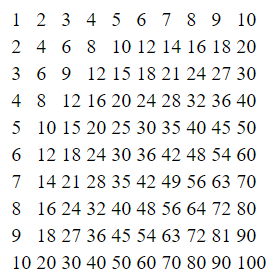

Ваш файл должен начинаться с тегов ```<html>``` и ```<body>``` и заканчиваться ```</body>``` и ```</html>```.

Для создания таблицы можно пользоваться тегами ```<table>``` (создание таблицы), ```<tr>``` (создание строки в таблице) и ```<td>``` (создание отдельной ячейки). Все открытые теги нужно закрыть, причем сделать это нужно в правильном порядке.

Пожалуйста, не используйте никаких украшений и других тегов - мы не сможем проверить такие решения.

In [ ]:
#!/usr/bin/env python3

print("<html>")
print("<body>")
print("<table>")
for i in range(1, 11):
  print("<tr>")
  for j in range(1, 11):
    print("<td>")
    print(i*j)
    print("</td>")
  print("</tr>")
print("</table>")
print("</body>")
print("</html>")

вариант степика

In [ ]:
from lxml import etree

html = etree.Element("html")
table = etree.SubElement(etree.SubElement(html,'body'),'table')

for i in range(1,11):
    row = etree.SubElement(table,'tr')
    for j in range(1,11):
        td = etree.SubElement(row,'td')
        td.text = str(i*j)
with open('l_5_1_step4.html','wb') as outf:
    outf.write(etree.tostring(html, pretty_print=True))

или

In [ ]:
st = '<html><body><table>'
for i in range(1, 11):
    st += '<tr>'
    for j in range(1, 11):
        st += '<td>' + str(i*j) + '</td>'
    st += '</tr>'
st += '</table></body></html>'
print(st)

или

In [ ]:
from yattag import Doc, indent

doc, tag, text, line = Doc().ttl()

with tag('html'):
    with tag('body'):
        with tag('table'):
            for tr in range(1, 11):
                with tag('tr'):
                    for td in range(1, 11):
                        with tag('td'):
                            text(tr*td)

print(indent(doc.getvalue()))

# 5.1.6

В этой задаче вам предстоит научиться создавать ссылки. Вам нужно сгенерировать html-код на питоне и сдать на проверку html-файл, в котором будет таблица размером 10 на 10, которая должна содержать таблицу умножения для чисел от 1 до 10. Каждое число в таблице должно быть ссылкой на страницу http://<это число>.ru. Например, число 12 должно быть ссылкой на страницу http://12.ru

При открытии вашего файла в браузере это должно выглядеть примерно так:

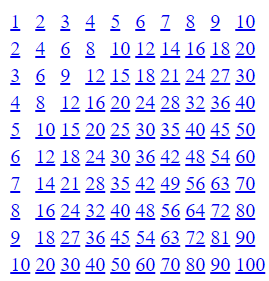

Ваш файл должен начинаться с тегов ```<html>``` и ```<body>``` и заканчиваться ```</body>``` и ```</html>```.

Для создания таблицы можно пользоваться тегами ```<table>``` (создание таблицы), ```<tr>``` (создание строки в таблице) и ```<td>``` (создание отдельной ячейки). Все открытые теги нужно закрыть, причем сделать это нужно в правильном порядке.

Для создания ссылки пользуйтесь тегом ```<a>```. Например, ссылка на страницу http://hse.ru с текстом "Высшая школа экономики" должна выглядеть так: ```<a href=http://hse.ru>```Высшая школа экономики```</a>```.

Пожалуйста, не используйте никаких украшений и других тегов - мы не сможем проверить такие решения.

In [ ]:
st = "<html><body><table>"
for i in range(1, 11):
  st += "<tr>"
  for j in range(1, 11):
    st += "<td>" + "<a href=http://" + str(i*j) + ".ru>" + str(i*j) + "</a>" + "</td>"
  st += "</tr>"
st += "</table></body></html>"
print(st)

<html><body><table><tr><td><a href=http://1.ru>1</a></td><td><a href=http://2.ru>2</a></td><td><a href=http://3.ru>3</a></td><td><a href=http://4.ru>4</a></td><td><a href=http://5.ru>5</a></td><td><a href=http://6.ru>6</a></td><td><a href=http://7.ru>7</a></td><td><a href=http://8.ru>8</a></td><td><a href=http://9.ru>9</a></td><td><a href=http://10.ru>10</a></td></tr><tr><td><a href=http://2.ru>2</a></td><td><a href=http://4.ru>4</a></td><td><a href=http://6.ru>6</a></td><td><a href=http://8.ru>8</a></td><td><a href=http://10.ru>10</a></td><td><a href=http://12.ru>12</a></td><td><a href=http://14.ru>14</a></td><td><a href=http://16.ru>16</a></td><td><a href=http://18.ru>18</a></td><td><a href=http://20.ru>20</a></td></tr><tr><td><a href=http://3.ru>3</a></td><td><a href=http://6.ru>6</a></td><td><a href=http://9.ru>9</a></td><td><a href=http://12.ru>12</a></td><td><a href=http://15.ru>15</a></td><td><a href=http://18.ru>18</a></td><td><a href=http://21.ru>21</a></td><td><a href=http://

# **5.2**

# 5.2.3

В этой задаче вам предстоит настроить и запустить веб-сервер. Создайте файл index.html с формой, в которой есть единственное текстовое поле ввода с именем INPUT_TEXT и кнопка отправить.

В папке cgi-bin создайте скрипт со следующим содержанием:
```
#!/usr/bin/env python3
import cgi

def ohash(s):
    ans = 0
    for c in s:
        ans = ans * 123417 + ord(c)
    return ans

form = cgi.FieldStorage()
text = form.getfirst("INPUT_TEXT", "не задано")

print("Content-type: text/html\n")
print("""<!DOCTYPE HTML>
        <html>
        <head>
            <meta charset="utf-8">
        </head>
        <body>""")

print("<h1>" + str(ohash(text)) + "</h1>")

print("""</body>
        </html>""")
```
Запустите скрипт, поднимающий веб-сервер с вашей формой, откройте страницу и введите слово Python (обязательно с большой буквы). У вас должна открыться страница, содержащая единственное число, введите его в качестве ответа.

# 5.2.4

В этой задаче вам предстоит настроить и запустить веб-сервер, а также обнаружить проблему в скрипте, обрабатывающем данные формы. Создайте файл index.html с формой, в которой есть единственное текстовое поле ввода с именем INPUT_TEXT и кнопка отправить.

В папке cgi-bin создайте скрипт со следующим содержанием:
```
#!/usr/bin/env python3
import cgi

form = cgi.FieldStorage()
text = form.getfirst("INPUT_TEXT", "не задано")
text = text[:-1]

print("Content-type: text/html\n")
print("""<!DOCTYPE HTML>
        <html>
        <head>
            <meta charset="utf-8">
        </head>
        <body>""")
		
for i in range(1, len(text) + 1, 2):
	print("<h1>" + str(hash(text[i])) + "</h1>")

print("""</body>
        </html>""")
```
Запустите скрипт, поднимающий веб-сервер с вашей формой, откройте страницу и введите слово Python (обязательно с большой буквы). У вас должна открыться страница, содержащая несколько чисел. Однако, если вы откроете ее исходный текст, то обнаружите, что она обрывается без закрытия некоторых тегов, а это значит, что что-то пошло не так.

Поймите, где искать сообщение об ошибке и в качестве ответа введите номер строки, в которой произошла ошибка.